In [35]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [36]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/train'
valid_path = 'cell_images/test'

In [37]:
# Image data generator with data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation data generator (no augmentation)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
batch_size=32
# Generate train and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size = (224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 27294 images belonging to 2 classes.
Found 264 images belonging to 2 classes.


Data Visualization

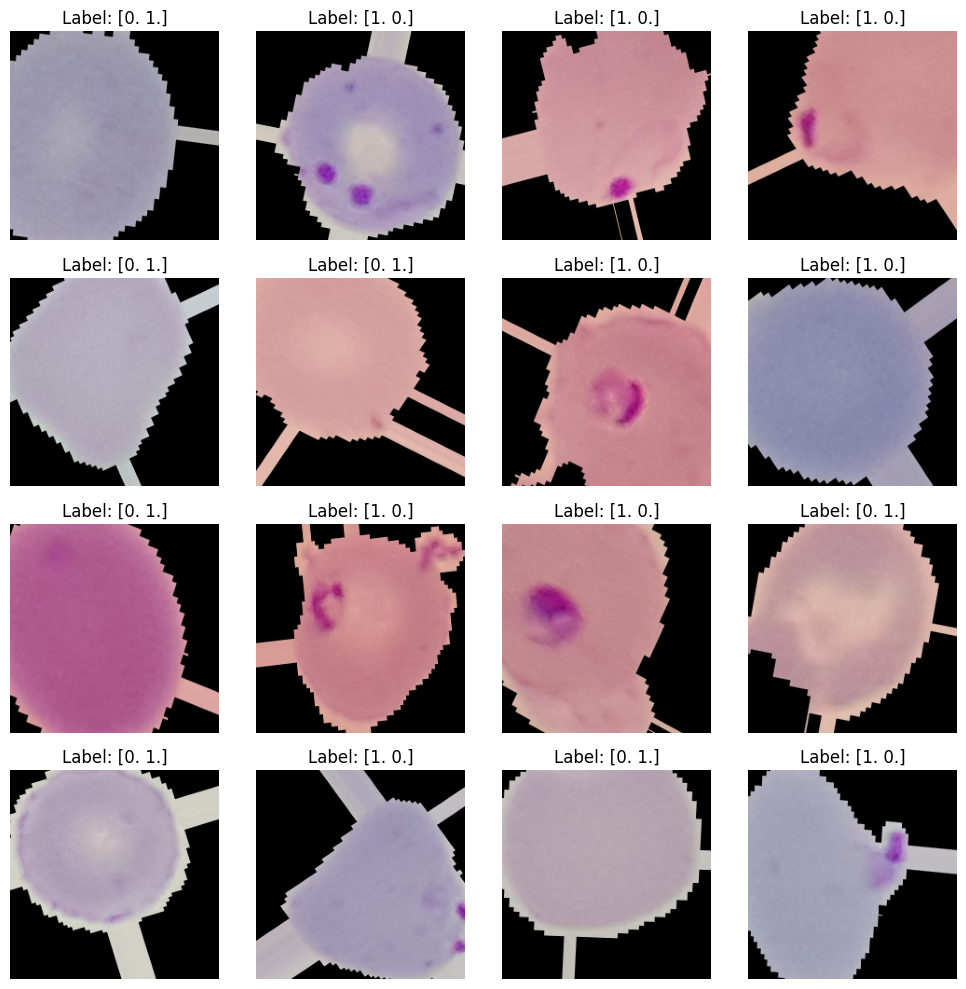

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_generator is already defined

# Display the first batch of images
images, labels = next(train_generator)

# Create a grid of subplots
plt.figure(figsize=(10, 10))
for i in range(16):  # Display 16 images
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title('Label: {}'.format(labels[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

### Create Model from scratch using CNN
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500,activation="relu"))
model.add(tf.keras.layers.Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 32)   │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │    25,088,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,100,046 (95.75 MB)

 Trainable params: 25,100,046 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 907s 1s/step - accuracy: 0.7089 - loss: 0.5666 - val_accuracy: 0.9414 - val_loss: 0.2027
Epoch 2/20
  1/852 ━━━━━━━━━━━━━━━━━━━━ 6:42 472ms/step - accuracy: 0.8750 - loss: 0.3784

C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.8750 - loss: 0.1894 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 3/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 630s 737ms/step - accuracy: 0.9093 - loss: 0.2611 - val_accuracy: 0.9297 - val_loss: 0.1975
Epoch 4/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 73us/step - accuracy: 0.9688 - loss: 0.0729 - val_accuracy: 1.0000 - val_loss: 0.0137
Epoch 5/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 619s 724ms/step - accuracy: 0.9177 - loss: 0.2482 - val_accuracy: 0.9609 - val_loss: 0.1339
Epoch 6/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 82us/step - accuracy: 0.9688 - loss: 0.0740 - val_accuracy: 1.0000 - val_loss: 0.0401
Epoch 7/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 645s 754ms/step - accuracy: 0.9222 - loss: 0.2295 - val_accuracy: 0.9688 - val_loss: 0.1179
Epoch 7: early stopping


In [ ]:
model.save('malaria-detection-model.h5')

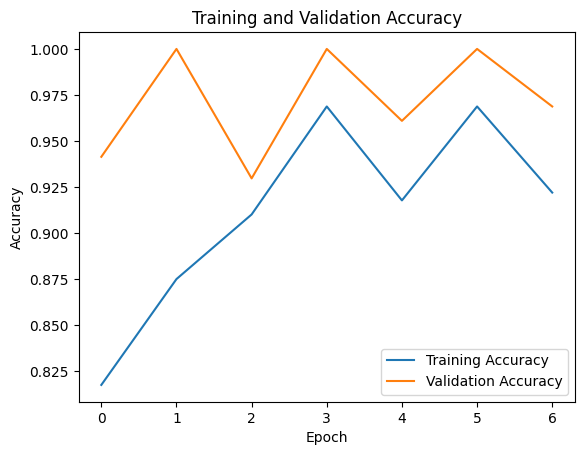

In [40]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

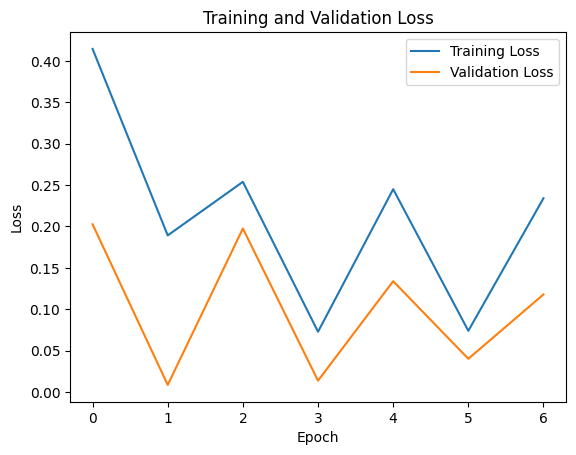

In [41]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [42]:
# Predictions
y_pred = model.predict(valid_generator)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


In [43]:
y_pred

array([[9.96622443e-01, 3.37752677e-03],
       [1.06381029e-02, 9.89361942e-01],
       [9.87861492e-03, 9.90121365e-01],
       [1.29584800e-02, 9.87041473e-01],
       [9.37260129e-03, 9.90627408e-01],
       [1.26972962e-02, 9.87302780e-01],
       [9.87433493e-01, 1.25664622e-02],
       [1.14171179e-02, 9.88582850e-01],
       [2.55926903e-02, 9.74407256e-01],
       [9.26603198e-01, 7.33968019e-02],
       [7.48628704e-03, 9.92513716e-01],
       [1.79956518e-02, 9.82004344e-01],
       [9.98972297e-01, 1.02776487e-03],
       [6.90679066e-03, 9.93093252e-01],
       [9.99999404e-01, 5.88162493e-07],
       [1.64456684e-02, 9.83554304e-01],
       [1.06341355e-02, 9.89365935e-01],
       [9.99132454e-01, 8.67622497e-04],
       [9.99957919e-01, 4.20677497e-05],
       [9.99466598e-01, 5.33412851e-04],
       [9.15350914e-01, 8.46491158e-02],
       [1.05370535e-02, 9.89462912e-01],
       [9.99974012e-01, 2.59441622e-05],
       [9.99997616e-01, 2.43279851e-06],
       [8.949120

In [44]:
y_pred = np.argmax(y_pred, axis=1)

In [45]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [46]:
# Get true labels from the validation generator
y_true = valid_generator.classes

In [47]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

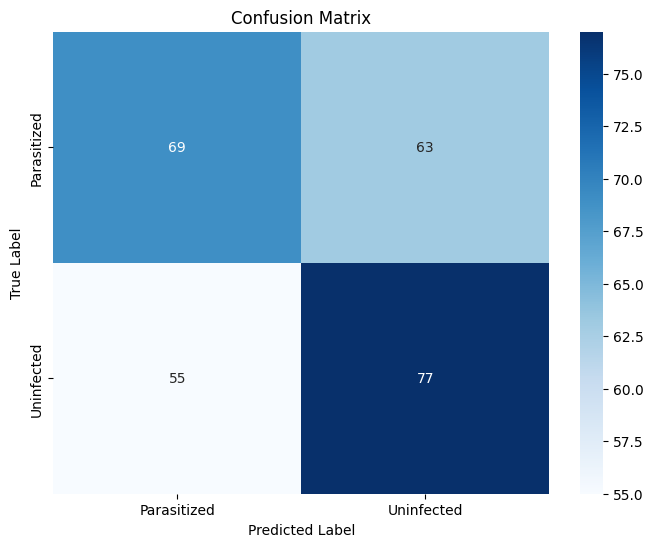

In [48]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()